In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv('/content/drive/MyDrive/Deep_Learning_TF_2_Notebooks_et_Datasets/DATA/cancer_classification.csv')

In [10]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


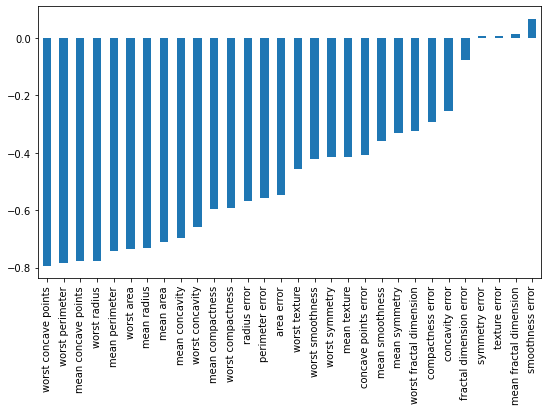

In [33]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar',figsize=(9,5))

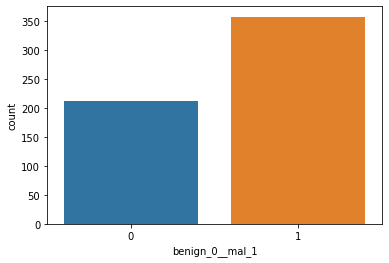

In [21]:
sns.countplot(x=df.benign_0__mal_1,data=df)

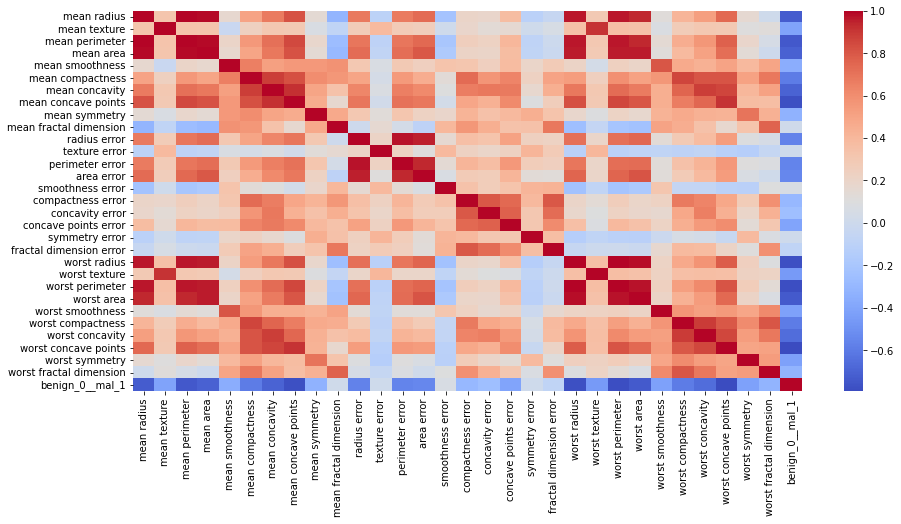

In [29]:
plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),cmap='coolwarm')

In [34]:
X=df.drop('benign_0__mal_1',axis=1)
y=df.benign_0__mal_1

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [38]:
scale=StandardScaler().fit(X_train)

In [39]:
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [43]:
X_train.shape

(426, 30)

In [44]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [48]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0015 - val_loss: 0.0522
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0014 - val_loss: 0.0527
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0520
Epoch 4/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0532
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 0.0530
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 0.0531
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0522
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0529
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0524
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0527
Epoc

In [51]:
loss=pd.DataFrame(model.history.history)

AttributeError: ignored

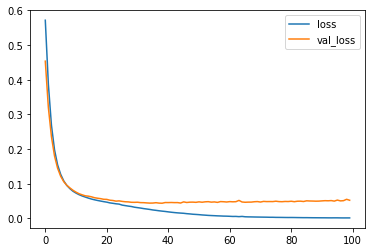

In [47]:
loss.plot()

In [52]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
stop=EarlyStopping(monitor='val_loss',patience=10,mode='min',verbose=1)

In [55]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[stop],epochs=400)

Epoch 1/400
14/14 [==============================] - 1s 27ms/step - loss: 0.5496 - val_loss: 0.4096
Epoch 2/400
14/14 [==============================] - 0s 7ms/step - loss: 0.3579 - val_loss: 0.2826
Epoch 3/400
14/14 [==============================] - 0s 8ms/step - loss: 0.2529 - val_loss: 0.2096
Epoch 4/400
14/14 [==============================] - 0s 8ms/step - loss: 0.1913 - val_loss: 0.1652
Epoch 5/400
14/14 [==============================] - 0s 7ms/step - loss: 0.1508 - val_loss: 0.1370
Epoch 6/400
14/14 [==============================] - 0s 7ms/step - loss: 0.1254 - val_loss: 0.1186
Epoch 7/400
14/14 [==============================] - 0s 7ms/step - loss: 0.1089 - val_loss: 0.1070
Epoch 8/400
14/14 [==============================] - 0s 8ms/step - loss: 0.0972 - val_loss: 0.0983
Epoch 9/400
14/14 [==============================] - 0s 8ms/step - loss: 0.0885 - val_loss: 0.0933
Epoch 10/400
14/14 [==============================] - 0s 7ms/step - loss: 0.0818 - val_loss: 0.0881
Epoch 11

In [56]:
loss=pd.DataFrame(model.history.history)

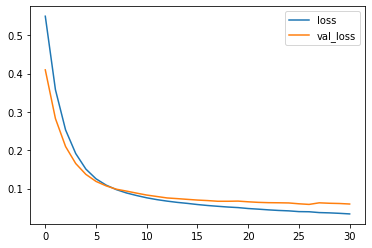

In [57]:
loss.plot()

In [65]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[stop],epochs=400)

Epoch 1/400
14/14 [==============================] - 1s 17ms/step - loss: 0.7966 - val_loss: 0.5316
Epoch 2/400
14/14 [==============================] - 0s 5ms/step - loss: 0.5343 - val_loss: 0.3854
Epoch 3/400
14/14 [==============================] - 0s 6ms/step - loss: 0.3824 - val_loss: 0.2954
Epoch 4/400
14/14 [==============================] - 0s 5ms/step - loss: 0.2959 - val_loss: 0.2374
Epoch 5/400
14/14 [==============================] - 0s 5ms/step - loss: 0.2383 - val_loss: 0.1979
Epoch 6/400
14/14 [==============================] - 0s 6ms/step - loss: 0.2175 - val_loss: 0.1687
Epoch 7/400
14/14 [==============================] - 0s 5ms/step - loss: 0.1821 - val_loss: 0.1460
Epoch 8/400
14/14 [==============================] - 0s 6ms/step - loss: 0.1539 - val_loss: 0.1284
Epoch 9/400
14/14 [==============================] - 0s 5ms/step - loss: 0.1501 - val_loss: 0.1152
Epoch 10/400
14/14 [==============================] - 0s 6ms/step - loss: 0.1380 - val_loss: 0.1050
Epoch 11

In [67]:
loss=pd.DataFrame(model.history.history)

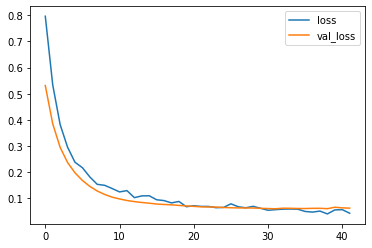

In [68]:
loss.plot()

In [75]:
pred=(model.predict(X_test)>0.5)

In [80]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



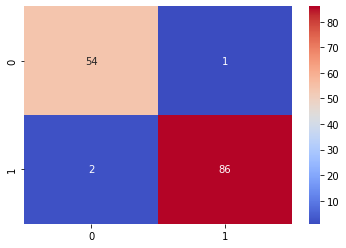

In [83]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')